# Full Moon Theatre Planning

This notebook is designed to help planning Full Moon Theatre events.

We start by importing the required external Python libraries.

In [56]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylunar
import geopy
from geopy.geocoders import Nominatim
from datetime import datetime, timedelta
from os.path import join
import math

We then select a location, the starting and ending dates for the Full Moon Theatre workshop and the target moment for the performance event.

The location should be indicated with the syntax "Location name, Country Code", for instance "Montpellier, FR".

In [59]:
# LOCATION_NAME = "Montpellier, FR"
# LOCATION_NAME = "Hooke Park, UK"
LOCATION_NAME = "Mexico City"
# LOCATION_NAME = "La Grange, Causse de la Selle, FR"
# LOCATION_NAME = "Théâtre de Verdure, Pl. des Aires, 13500 Martigues"
# LOCATION_NAME = "Saint-Roman-de-Codières, Occitanie"

We use the Nominatim service to derive the latitude and longitude of the selected location.

In [60]:
geolocator = Nominatim(user_agent="full_moon")
location = geolocator.geocode(LOCATION_NAME)
print("Address:", location.address)
print("Latitude:", location.latitude)
print("Longitude:", location.longitude)

Address: Ciudad de México, México
Latitude: 19.4326296
Longitude: -99.1331785


We then define the following function to help converting decimal degrees to degrees, minutes and seconds. 
We must do this because the `pylunar` library uses this input format for latitude and longitude.

In [61]:
def deg_to_dms(deg):
    """Convert from decimal degrees to degrees, minutes, seconds."""
    m, s = divmod(abs(deg)*3600, 60)
    d, m = divmod(m, 60)
    if deg < 0:
        d = -d
    d, m = int(d), int(m)
    return d, m, s

In [62]:
latitude_dms = deg_to_dms(location.latitude)
longitude_dms = deg_to_dms(location.longitude)
print("Latitude (DMS):", latitude_dms)
print("Longitude (DMS):", longitude_dms)

Latitude (DMS): (19, 25, 57.466560000000754)
Longitude (DMS): (-99, 7, 59.442600000009406)


We can now use the `pylunar` library to identify the dates and times of the Full Moons over the next year.

In [63]:
def highest_full_moon_time(moon_info, full_moon_date):
    highest_hour = 0
    highest_minutes = 0
    highest_altitude = 0
    highest_azimuth = 0
    highest_emoji = ""
    year = full_moon_date[0]
    month = full_moon_date[1]
    day = full_moon_date[2]
    for hour in range(0,24):
        for minutes in range(0,60,1):
            moment = (year, month, day, hour, minutes, 0)
            moon_info.update(moment)
            if moon_info.altitude()>highest_altitude:
                highest_altitude = moon_info.altitude()
                highest_azimuth = moon_info.azimuth()
                highest_hour = hour
                highest_minutes = minutes
                highest_emoji = moon_info.phase_emoji()
    return highest_hour, highest_minutes, highest_azimuth, highest_altitude, highest_emoji

moon_info = pylunar.MoonInfo(latitude_dms, longitude_dms)

now_year = int(datetime.strftime(datetime.now(),'%Y'))
now_month = int(datetime.strftime(datetime.now(),'%m'))
now_day = int(datetime.strftime(datetime.now(),'%d'))
# date initialisation
startDate = datetime(now_year, now_month, now_day)-timedelta(days=28)
endDate = datetime(now_year+2, now_month, now_day)

events = []
years = []
months = []
days = []
dows = []
hours = []
minutes = []
fm_azis = []
fm_alts = []
hm_hours = []
hm_mins = []
hm_azis = []
hm_alts = []
hm_emojis = []
 
while startDate <= endDate:
    moon_info.update(startDate)
    time_to_full_moon = moon_info.time_to_full_moon()
    startDate += timedelta(days=int(time_to_full_moon+1))
    moon_info.update(startDate)
    full_moon = moon_info.next_four_phases()[3]
    full_moon_date = full_moon[1]
    day_of_the_week = datetime(full_moon_date[0], full_moon_date[1], full_moon_date[2]).strftime('%A')
    moon_info.update(datetime(full_moon_date[0], full_moon_date[1], full_moon_date[2], 23, 0))
    highest_hour, highest_minutes, highest_azimuth, highest_altitude, highest_emoji = highest_full_moon_time(moon_info, full_moon_date)
    events.append(full_moon[0])
    years.append(full_moon[1][0])
    months.append(full_moon[1][1])
    days.append(full_moon[1][2])
    dows.append(day_of_the_week)
    hours.append(full_moon[1][3])
    minutes.append(full_moon[1][4])
    fm_azis.append(moon_info.azimuth())
    fm_alts.append(moon_info.altitude())
    hm_hours.append(highest_hour)
    hm_mins.append(highest_minutes)
    hm_azis.append(highest_azimuth)
    hm_alts.append(highest_altitude)
    hm_emojis.append(highest_emoji)

full_moons = pd.DataFrame({
    "event": events,
    "year": years,
    "month": months,
    "day": days,
    "day of the week": dows,
    "hour": hours,
    "minute": minutes,
    "full moon azimuth": fm_azis,
    "full moon altitude": fm_alts,
    "highest moon hour": hm_hours,
    "highest moon minute": hm_mins,
    "highest moon azimuth": hm_azis,
    "highest moon altitude": hm_alts,
    "highest moon emoji": hm_emojis
})

full_moons

,event,year,month,day,day of the week,hour,minute,full moon azimuth,full moon altitude,highest moon hour,highest moon minute,highest moon azimuth,highest moon altitude,highest moon emoji
0,full_moon,2024,4,23,Tuesday,23,48,101.238867,-13.427284,6,0,179.074309,59.504089,🌔
1,full_moon,2024,5,23,Thursday,13,53,111.291403,-20.636291,6,12,179.281469,46.558599,🌔
2,full_moon,2024,6,22,Saturday,1,7,111.494430,-30.202536,6,53,180.123140,41.534131,🌖
3,full_moon,2024,7,21,Sunday,10,17,106.635324,-26.217744,6,40,180.421387,44.414190,🌔
4,full_moon,2024,8,19,Monday,18,25,99.032832,-18.964087,6,21,181.151616,51.454865,🌔
5,full_moon,2024,9,18,Wednesday,2,34,79.523940,-17.811586,6,43,181.553012,68.820324,🌖
6,full_moon,2024,10,17,Thursday,11,26,72.269016,-6.997484,6,9,181.410863,79.907701,🌔
7,full_moon,2024,11,15,Friday,21,28,66.389685,1.527899,5,40,174.104759,89.704447,🌔
8,full_moon,2024,12,15,Sunday,9,1,57.442765,-5.915497,6,24,0.226444,81.151779,🌔
9,full_moon,2025,1,13,Monday,22,26,61.435134,-2.508046,6,12,358.947068,81.843589,🌔


We can now use the `pylunar` library to obtain information about the Moon position and conditions on the target date and time.

In [68]:
TARGET_MOMENT = (2024, 9, 18, 2, 30, 0) # format: (YEAR, MONTH, DAY, HOUR, MINUTES, SECONDS)
START_DAY = [2024, 9, 13] # format: [YEAR, MONTH, DAY]
END_DAY = [2024, 9, 18] # format: [YEAR, MONTH, DAY]

moon_info = pylunar.MoonInfo(latitude_dms, longitude_dms)
moon_info.update(TARGET_MOMENT)
print("Target Moon's azimuth:", moon_info.azimuth())
print("Target Moon's altitude:", moon_info.altitude())
print("Target Moon's age (days):", moon_info.age())
print("Target Moon's fractional phase:", moon_info.fractional_phase())
print("Target Moon's phase name:", moon_info.phase_name())
print("Target Moon's magnitude (measure of the brightness of a celestial object):", moon_info.magnitude())
print("Distance of target Moon's from Earth:", moon_info.earth_distance(), "km")
print("Next four Moon phases:", moon_info.next_four_phases())

Target Moon's azimuth: 103.41103795866319
Target Moon's altitude: 25.73836748144642
Target Moon's age (days): 15.023947228633915
Target Moon's fractional phase: 0.9999159553416861
Target Moon's phase name: FULL_MOON
Target Moon's magnitude (measure of the brightness of a celestial object): -12.8
Distance of target Moon's from Earth: 354673.0228853505 km
Next four Moon phases: [('full_moon', (2024, 9, 18, 2, 34, 24.104437)), ('last_quarter', (2024, 9, 24, 18, 49, 48.954031)), ('new_moon', (2024, 10, 2, 18, 49, 13.544389)), ('first_quarter', (2024, 10, 10, 18, 55, 4.685985))]


With the following function we can convert the target Moon's position from spherical coordinates (azimuth and altitude) to orthogonal versors, that can be used in external tools like Rhino.

In [69]:
def spherical_to_versors(r, azimuth, altitude):
    x = r * math.sin(altitude) * math.cos(azimuth)
    y = - r * math.sin(altitude) * math.sin(azimuth)
    z = - r * math.cos(altitude)
    return x, y, z

In [70]:
spherical_to_versors(1, math.radians(moon_info.azimuth()), math.radians((moon_info.altitude() + 180) % 360))
# spherical_to_versors(1, math.radians(0), math.radians((45 + 180) % 360))

(0.10072077759879818, 0.4224205756090709, 0.9007864243326464)

Now we calculate the position of the Moon over the workshop days for every hour.

In [71]:
# moon_positions = []
moon_positions = pd.DataFrame(columns = ["year","month","day","hour","minutes","azimuth","altitude"])
for year in range(START_DAY[0], END_DAY[0]+1):
    for month in range(START_DAY[1], END_DAY[1]+1):
        for day in range(START_DAY[2], END_DAY[2]+1):
            for hour in range(0,24):
                for minutes in range(0,60+1,10):
                    moment = (year, month, day, hour, minutes, 0)
                    moon_info.update(moment)
                    if moon_info.altitude()>0:
                        moon_positions.loc[len(moon_positions)] = [year, month, day, hour, minutes, 
                                                               moon_info.azimuth(), moon_info.altitude()]
print(moon_positions)

       year  month   day  hour  minutes     azimuth   altitude
0    2024.0    9.0  13.0   0.0      0.0  147.779790  33.507921
1    2024.0    9.0  13.0   0.0     10.0  149.924210  34.697655
2    2024.0    9.0  13.0   0.0     20.0  152.158665  35.812478
3    2024.0    9.0  13.0   0.0     30.0  154.482350  36.847491
4    2024.0    9.0  13.0   0.0     40.0  156.893256  37.797775
..      ...    ...   ...   ...      ...         ...        ...
453  2024.0    9.0  18.0  12.0     10.0  266.741017   9.090293
454  2024.0    9.0  18.0  12.0     20.0  267.610254   6.856210
455  2024.0    9.0  18.0  12.0     30.0  268.470776   4.642011
456  2024.0    9.0  18.0  12.0     40.0  269.325451   2.474100
457  2024.0    9.0  18.0  12.0     50.0  270.177039   0.428053

[458 rows x 7 columns]


And finally we plot these positions in a polar diagram.

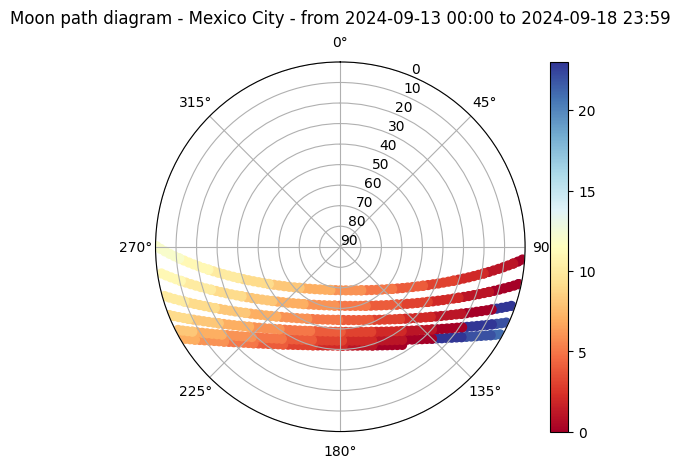

In [72]:
# moon_positions['azimuth_rad'] = moon_positions.apply(lambda row: row.azimuth*math.pi/180, axis=1)
# plt.polar(moon_positions['azimuth_rad'].values,moon_positions['altitude'].values)
# plt.show()

time_format = "%Y-%m-%d %H:%M"
start_time = datetime(START_DAY[0], START_DAY[1], START_DAY[2]).strftime(time_format)
end_time = datetime(END_DAY[0], END_DAY[1], END_DAY[2], 23, 59).strftime(time_format)

ax = plt.subplot(1, 1, 1, projection='polar')

cm = matplotlib.colormaps['RdYlBu']

points = ax.scatter(np.radians(moon_positions['azimuth'].values), moon_positions['altitude'].values,
                    s=40, label="Hours", c=moon_positions['hour'].values, cmap=cm)

ax.figure.colorbar(points)
ax.set_theta_zero_location('N', offset=0)
ax.set_rlim(bottom=90, top=0)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlim(90, 0)
# Note: you must set the end of arange to be slightly larger than 90 or it won't include 90
ax.set_yticks(np.arange(0, 91, 10))
# ax.set_yticklabels(ax.get_yticks()[::-1])
# ax.set_rmax(90)
# ax.set_rmin(0)

# plt.rcParams['figure.figsize'] = [15, 10]

ax.set_title("Moon path diagram - %s - from %s to %s" %(LOCATION_NAME, start_time, end_time), va='bottom')


plt.show()

We can now load the corrected fisheye image of the sky taken at the location with the top of the camera and image facing north. We flip the image horizontally (left to right) because we want to superimpose it to the moon path plot.

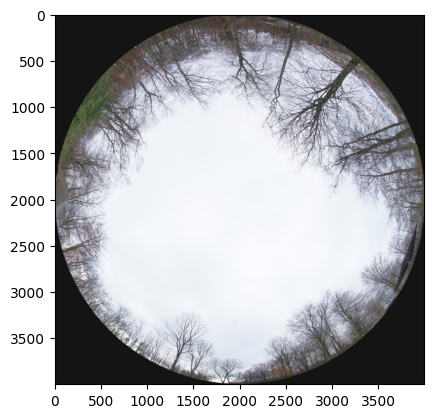

In [73]:
FISHEYE_PATH = join("img", "fmt-up_corrected.jpg")

fisheye = plt.imread(FISHEYE_PATH)
img = plt.imshow(np.fliplr(fisheye), origin='upper')
plt.show()

The next step is to superimpose the image to the plot.

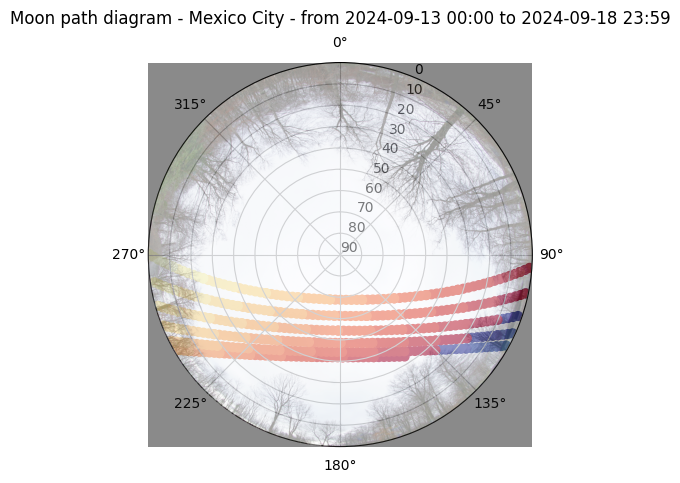

In [74]:
time_format = "%Y-%m-%d %H:%M"
start_time = datetime(START_DAY[0], START_DAY[1], START_DAY[2]).strftime(time_format)
end_time = datetime(END_DAY[0], END_DAY[1], END_DAY[2], 23, 59).strftime(time_format)

cm = matplotlib.colormaps['RdYlBu']

fig = plt.gcf()
axes_coords = [0.1, 0.1, 0.8, 0.8]

ax_polar = fig.add_axes(axes_coords, projection = 'polar', label="ax polar")

ax_polar.patch.set_alpha(0)

points = ax_polar.scatter(np.radians(moon_positions['azimuth'].values), moon_positions['altitude'].values,
                    s=40, label="Hours", c=moon_positions['hour'].values, cmap=cm)

ax_polar.set_theta_zero_location('N', offset=0)
ax_polar.set_rlim(bottom=90, top=0)
# ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(-1)
# ax_polar.set_rlim(90, 0, 1)
# Note: you must set the end of arange to be slightly larger than 90 or it won't include 90
# ax_polar.set_yticks(np.arange(0, 91, 10))
# ax_polar.set_yticklabels(ax.get_yticks()[::-1])
ax.set_rmax(0)
ax.set_rmin(90)
# ax_polar.axis('on')

ax_image = fig.add_axes(axes_coords, label="ax image")
ax_image.imshow(np.fliplr(fisheye), origin='upper', alpha = .5, extent=None)
ax_image.axis('off')  # don't show the axes ticks/lines/etc. associated with the image

# ax.set_title("Moon path diagram - %s - from %s to %s" %(LOCATION_NAME, start_time, end_time), va='bottom')
ax_polar.set_title("Moon path diagram - %s - from %s to %s" %(LOCATION_NAME, start_time, end_time), va='bottom')


plt.show()